- Generate 10 samples from a uniform distribution.
- Find the difference between the 5th and 6th largest sample.
- Repeat the above steps 10,000 times to get a list of differences.
- Plot a histogram of the differences.
- Visually inspect the histogram to identify the distribution.
- Formulate a method to approximate parameters of the identified distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
np.random.seed(777)

In [11]:
# generate 10 samples of uniform distribution
samples = np.random.uniform(0,1,10)
samples_sorted = np.sort(samples)
samples_sorted[5] - samples_sorted[4]

0.007088564806753017

In [12]:
def get_difference():
    samples = np.random.uniform(0,1,10)
    samples_sorted = np.sort(samples)
    diff = samples_sorted[5] - samples_sorted[4]
    return diff

In [18]:
differences = [get_difference() for _ in range(10000)]

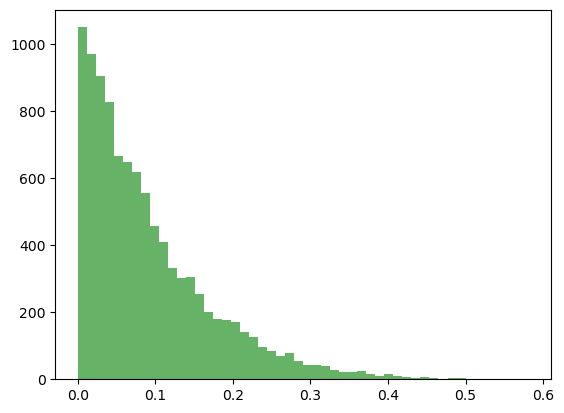

In [20]:
plt.hist(differences, bins=50, alpha=0.6, color='g', label="Observed DIfference")
plt.show()

The distribution in the provided image resembles a Beta distribution that's skewed towards 0. The Beta distribution is defined on the interval [0,1] which matches the domain of your plot.

A Beta distribution is characterized by two parameters, α (alpha) and β (beta). The shapes of these parameters determine the appearance of the distribution. For instance:

- α = β = 1 results in a uniform distribution.
- α < 1 and β < 1 make the distribution U-shaped.
- α > β skews the distribution towards 1.
- α < β skews the distribution towards 0.

From the given plot, it appears that α < β, which is leading to a skew towards 0.

To approximate the parameters:

1. **Moment Matching Method**: Use sample moments (like sample mean and variance) and equate them to the theoretical moments of the Beta distribution to solve for α and β.

   - Sample mean, `m = np.mean(differences)`
   - Sample variance, `v = np.var(differences)`
   
   Using the relationships:
   
   \[ m = \frac{α}{α + β} \]
   \[ v = \frac{αβ}{(α + β)^2(α + β + 1)} \]
   
   You can derive estimates for α and β from the above equations.

2. **Maximum Likelihood Estimation (MLE)**: Optimize the likelihood function of the Beta distribution using optimization techniques to derive estimates for α and β. Python libraries such as `scipy` can be used to perform this optimization.

3. **Graphical or Empirical Methods**: Plot the empirical cumulative distribution function (CDF) of your data against the CDF of the Beta distribution for different parameters. The parameters that provide the best fit (i.e., the two curves are the closest) are the estimated parameters.

4. **Bayesian Methods**: If you have a prior belief about the distribution of the parameters, you can use Bayesian methods to update your beliefs based on the observed data.

For practical purposes and ease of implementation, moment matching or MLE methods are commonly used to estimate parameters. After estimating the parameters, it's always a good idea to overlay the theoretical distribution over the observed data to see how well it fits.

In [23]:
from scipy.optimize import minimize
from scipy.stats import beta

In [36]:
def negative_log_likelihood(params):
    # print(params)
    a, b = params
    return -np.sum(beta.logpdf(differences, a, b))

In [37]:
# initialize the beta distribution parameters
init_params = [1,1]

In [38]:
# Optimize the negative log-likelihood function
result = minimize(negative_log_likelihood, init_params, method='L-BFGS-B', bounds=[(0.001, None), (0.001, None)])

In [39]:
result

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -13998.730377487052
        x: [ 1.020e+00  1.015e+01]
      nit: 14
      jac: [ 4.547e-03 -1.819e-04]
     nfev: 51
     njev: 17
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [40]:
alpha_hat, beta_hat = result.x
print(alpha_hat, beta_hat)

1.0196479856107898 10.154926226244815


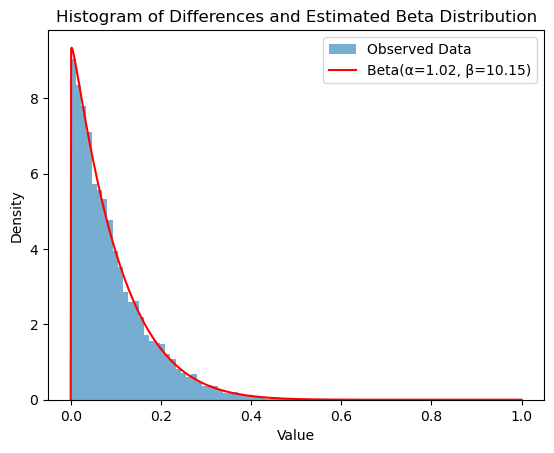

In [28]:
# Plot the distribution with the estimated parameters

# Generate x values
x = np.linspace(0, 1, 1000)

# Compute PDF values
pdf_values = beta.pdf(x, alpha_hat, beta_hat)

# Plot the histogram of your data and the estimated Beta distribution
plt.hist(differences, bins=50, density=True, alpha=0.6, label='Observed Data')
plt.plot(x, pdf_values, 'r-', label=f'Beta(α={alpha_hat:.2f}, β={beta_hat:.2f})')
plt.title("Histogram of Differences and Estimated Beta Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

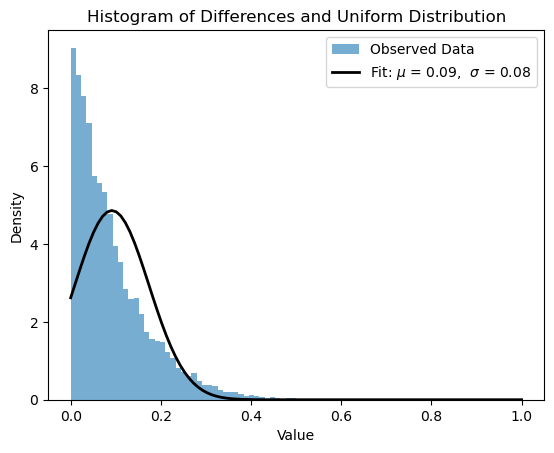

In [29]:
# Lets assume if it is a normal distribution
# Let's fit a normal distribution to the data
mu, std = norm.fit(differences)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.hist(differences, bins=50, density=True, alpha=0.6, label='Observed Data')
plt.plot(x, p, 'k', linewidth=2, label=f"Fit: $\mu$ = {mu:.2f},  $\sigma$ = {std:.2f}")
plt.title("Histogram of Differences and Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()